# EDA on retail Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#original credit to https://www.linkedin.com/in/prashant-kumar-99192355/

**Importing libraries**

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

**work with csv file**

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Data_science/OnlineRetail.csv',encoding = 'latin1')

In [9]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,JUMBO BAG PINK POLKADOT,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,BLUE POLKADOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,RED RETROSPOT WRAP,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,RECYCLING BAG RETROSPOT,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [10]:
data.shape

(499428, 8)

In [11]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
data = data.drop(['Description'],axis = 1)

In [13]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [14]:
data = data.rename(columns = {"StockCode":"SKU"})

In [15]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,1/4/2011 10:00,1.95,13313.0,United Kingdom
1,539993,21499,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
2,539993,21498,25,1/4/2011 10:00,0.42,13313.0,United Kingdom
3,539993,22379,5,1/4/2011 10:00,2.10,13313.0,United Kingdom
4,539993,20718,10,1/4/2011 10:00,1.25,13313.0,United Kingdom


In [16]:
data.dtypes

InvoiceNo       object
SKU             object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [17]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [18]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [19]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom


In [20]:
data['Date'] = data['InvoiceDate'].apply(lambda x: str(x).split(" "))

In [21]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]"


In [22]:
data[['date','hour']] = pd.DataFrame(data['Date'].tolist(), index = data.index)

In [23]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [24]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date                   object
hour                   object
dtype: object

In [25]:
data['date'] = pd.to_datetime(data['date'])

In [26]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [27]:
data.dtypes

InvoiceNo              object
SKU                    object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
Date                   object
date           datetime64[ns]
hour                   object
dtype: object

# checking null values

In [28]:
pd.DataFrame(data.isnull().sum(), columns = ['null values'])

,null values
InvoiceNo,0
SKU,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,119449
Country,0
Date,0
date,0
hour,0


In [29]:
pd.DataFrame(round(data.isnull().sum()/data.shape[0]*100,3), columns = ['null values%'])

,null values%
InvoiceNo,0.000
SKU,0.000
Quantity,0.000
InvoiceDate,0.000
UnitPrice,0.000
CustomerID,23.917
Country,0.000
Date,0.000
date,0.000
hour,0.000


In [30]:
data = data.dropna(subset = ['CustomerID'])

In [31]:
data.shape

(379979, 10)

In [32]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00


In [33]:
data['Year'] = pd.DatetimeIndex(data['InvoiceDate']).year

In [34]:
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day

In [35]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4


In [36]:
len(data['Month'].unique())

12

In [37]:
len(data['InvoiceNo'].unique()) #20482

20482

In [38]:
len(data['SKU'].unique()) 

3612

### revenue by month

In [39]:
data['revenue'] = data['UnitPrice']*data['Quantity']

In [40]:
data.head()

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,revenue
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.5
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.5
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.5


In [41]:
data_revenue = data.groupby('Month')['revenue'].sum().reset_index()

In [42]:
data_revenue

,Month,revenue
0,1,475074.380
1,2,436546.150
2,3,579964.610
3,4,426047.851
4,5,648251.080
5,6,608013.160
6,7,574238.481
7,8,616368.000
8,9,931440.372
9,10,974603.590


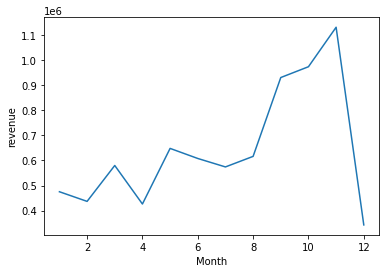

In [43]:
ax = sns.lineplot(x = 'Month', y = 'revenue', data = data_revenue, sort = False)

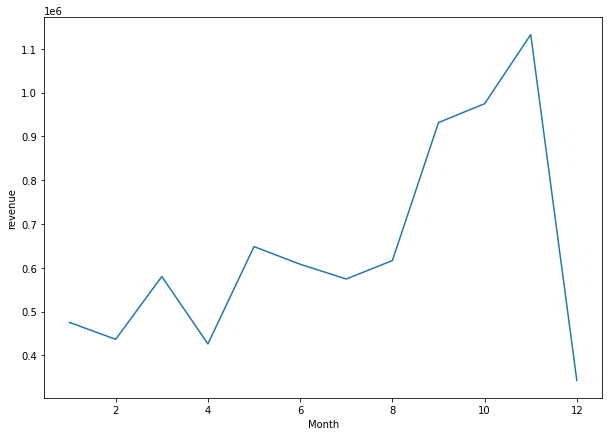

In [44]:
fig,axes = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x = 'Month', y = 'revenue', data = data_revenue, sort = False)

Text(0.5, 1.0, 'Revenue per month')

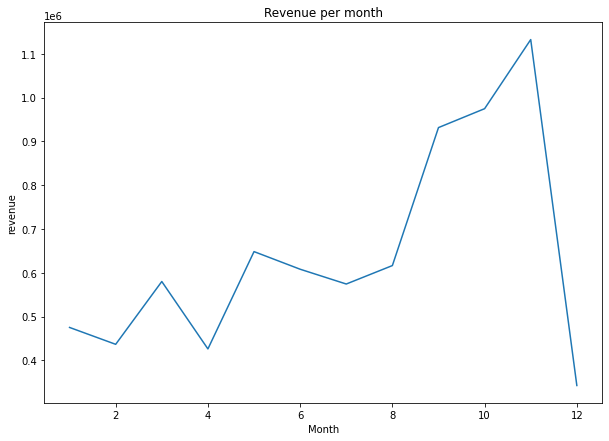

In [45]:
fig,axes = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x = 'Month', y = 'revenue', data = data_revenue, sort = False)

ax.set_title('Revenue per month')

In [46]:
#monthly growth rate

In [47]:
data_revenue['MonthlyGrowth'] = data_revenue['revenue'].pct_change()

In [48]:
data_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [49]:
data_revenue = data_revenue.loc[data_revenue['Month']!=12]

In [50]:
data_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,NaN
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


In [51]:
data_revenue['MonthlyGrowth'] = data_revenue['MonthlyGrowth'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
data_revenue

,Month,revenue,MonthlyGrowth
0,1,475074.380,0.000000
1,2,436546.150,-0.081099
2,3,579964.610,0.328530
3,4,426047.851,-0.265390
4,5,648251.080,0.521545
5,6,608013.160,-0.062072
6,7,574238.481,-0.055549
7,8,616368.000,0.073366
8,9,931440.372,0.511176
9,10,974603.590,0.046340


Text(0.5, 1.0, 'Monthly Growth Rate')

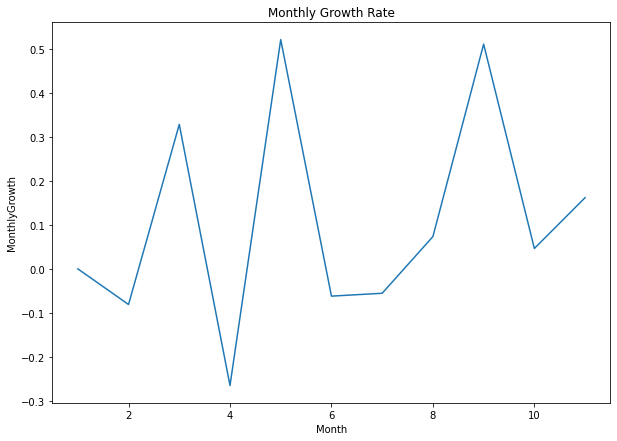

In [53]:
fig,axes = plt.subplots(figsize = (10,7))
ax = sns.lineplot(x = 'Month', y = 'MonthlyGrowth', data = data_revenue, sort = False)

ax.set_title('Monthly Growth Rate')

# monthly active custmers 

In [54]:
data_monthly_active = data.groupby('Month')['CustomerID'].nunique().reset_index()

In [55]:
data_monthly_active

,Month,CustomerID
0,1,783
1,2,798
2,3,1020
3,4,899
4,5,1079
5,6,1051
6,7,993
7,8,980
8,9,1302
9,10,1425


Text(0.5, 1.0, 'Monthly Active Customers by Month')

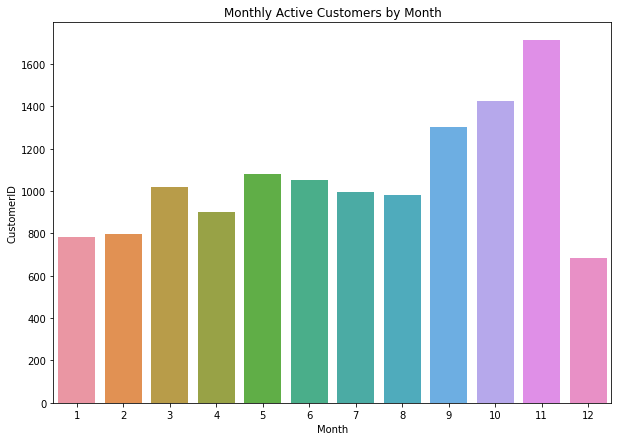

In [56]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'CustomerID', data = data_monthly_active)

ax.set_title('Monthly Active Customers by Month')

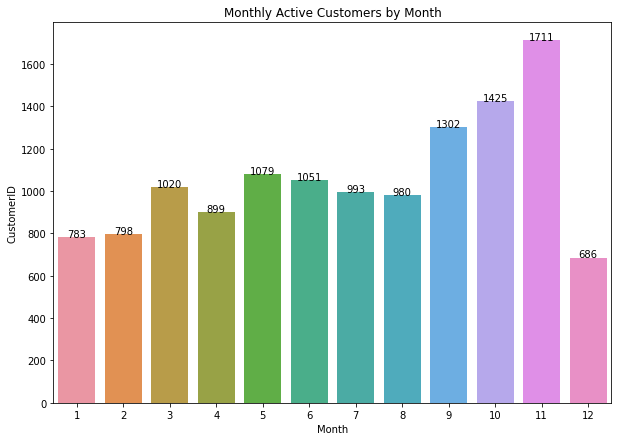

In [57]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'CustomerID', data = data_monthly_active)

ax.set_title('Monthly Active Customers by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

# total unique order by month

In [58]:
data_unique_order = data.groupby('Month')['InvoiceNo'].nunique().reset_index()

In [59]:
data_unique_order

,Month,InvoiceNo
0,1,1236
1,2,1202
2,3,1619
3,4,1384
4,5,1849
5,6,1707
6,7,1593
7,8,1544
8,9,2078
9,10,2263


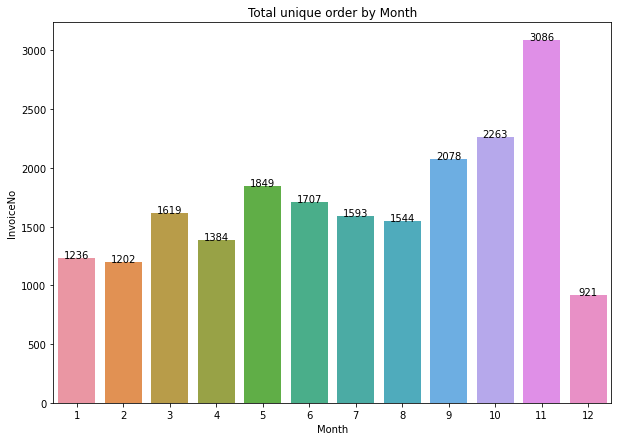

In [60]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'InvoiceNo', data = data_unique_order)

ax.set_title('Total unique order by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

In [61]:
data_order_sales = data.groupby('Month')['Quantity'].sum().reset_index()

In [62]:
data_order_sales

,Month,Quantity
0,1,269379
1,2,262833
2,3,344012
3,4,278585
4,5,367852
5,6,356922
6,7,363418
7,8,386612
8,9,537496
9,10,569666


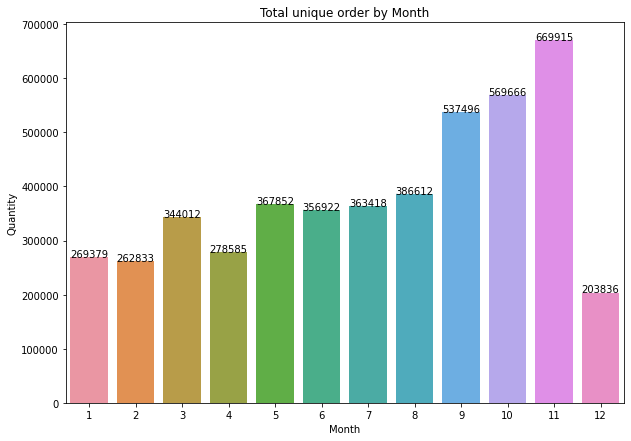

In [63]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'Quantity', data = data_order_sales)

ax.set_title('Total unique order by Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

# average revenue

In [64]:
data_avg_revenue = data.groupby('Month')['revenue'].mean().reset_index()

In [65]:
data_avg_revenue

,Month,revenue
0,1,21.681014
1,2,21.438204
2,3,20.845540
3,4,18.365715
4,5,22.424626
5,6,21.842691
6,7,20.879881
7,8,22.282120
8,9,22.817118
9,10,19.224846


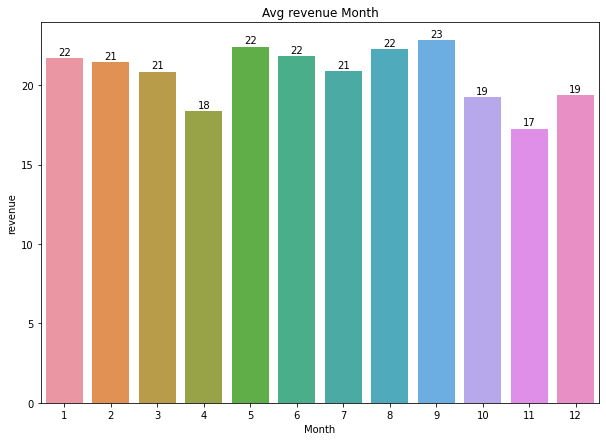

In [66]:
fig,axes = plt.subplots(figsize = (10,7))

ax = sns.barplot(x = 'Month', y = 'revenue', data = data_avg_revenue)

ax.set_title('Avg revenue Month')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x()+(p.get_width()/2),y = height +0.2, ha = 'center', s= '{:.0f}'.format(height))

In [67]:
data_min_date_buy = data.groupby('CustomerID').date.min().reset_index()

In [68]:
data_min_date_buy

,CustomerID,date
0,12346.0,2011-01-18
1,12347.0,2011-01-26
2,12348.0,2011-01-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4239,18280.0,2011-03-07
4240,18281.0,2011-06-12
4241,18282.0,2011-08-05
4242,18283.0,2011-01-06


In [69]:
data_min_date_buy.columns = ['CustomerID', 'MinPurchaseDate']

In [70]:
data_min_date_buy['MinPurchaseMonth'] = data_min_date_buy['MinPurchaseDate'].map(lambda date:date.month)

In [71]:
data_min_date_buy

,CustomerID,MinPurchaseDate,MinPurchaseMonth
0,12346.0,2011-01-18,1
1,12347.0,2011-01-26,1
2,12348.0,2011-01-25,1
3,12349.0,2011-11-21,11
4,12350.0,2011-02-02,2
...,...,...,...
4239,18280.0,2011-03-07,3
4240,18281.0,2011-06-12,6
4241,18282.0,2011-08-05,8
4242,18283.0,2011-01-06,1


In [72]:
data = pd.merge(data, data_min_date_buy, on = 'CustomerID')

In [73]:
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,revenue,MinPurchaseDate,MinPurchaseMonth
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12


In [74]:
data['UserType'] = 'New'
data.loc[data['Month']>data['MinPurchaseMonth'],'UserType'] = 'Existing'

In [75]:
data

,InvoiceNo,SKU,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,date,hour,Year,Month,Day,revenue,MinPurchaseDate,MinPurchaseMonth,UserType
0,539993,22386,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,19.50,2011-01-04,1,New
1,539993,21499,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
2,539993,21498,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
3,539993,22379,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,10.50,2011-01-04,1,New
4,539993,20718,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,"[2011-01-04, 10:00:00]",2011-01-04,10:00:00,2011,1,4,12.50,2011-01-04,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379974,581578,22993,12,2011-12-09 12:16:00,1.25,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,15.00,2011-12-09,12,New
379975,581578,22907,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379976,581578,22908,12,2011-12-09 12:16:00,0.85,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,10.20,2011-12-09,12,New
379977,581578,23215,12,2011-12-09 12:16:00,2.08,12713.0,Germany,"[2011-12-09, 12:16:00]",2011-12-09,12:16:00,2011,12,9,24.96,2011-12-09,12,New


# Revenue for usertype

In [76]:
data_userType_revenue = data.groupby(['Month','UserType'])['revenue'].sum().reset_index()

In [77]:
data_userType_revenue

,Month,UserType,revenue
0,1,New,475074.380
1,2,Existing,222645.040
2,2,New,213901.110
3,3,Existing,356562.750
4,3,New,223401.860
5,4,Existing,283526.090
6,4,New,142521.761
7,5,Existing,518892.810
8,5,New,129358.270
9,6,Existing,508100.200


Text(0.5, 1.0, 'Revenue for usertype')

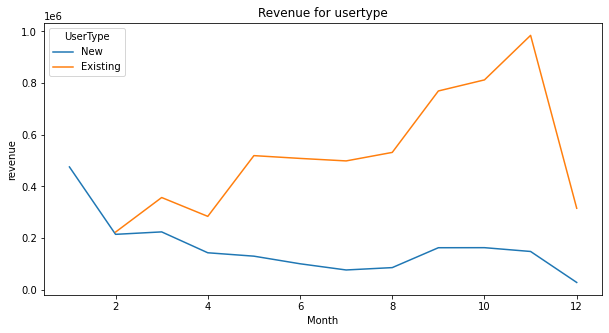

In [78]:
fig,axes = plt.subplots(figsize = (10,5))

ax = sns.lineplot(data =data_userType_revenue, x = "Month", y = "revenue", hue = "UserType" )

ax.set_title('Revenue for usertype')